# DataReader를 이용하여 Naver 에서 삼성전자 주가를 가져와서 그래프로 그려낸다.

In [14]:
import pandas_datareader.data as web
import pandas as pd
df = web.DataReader('005930', 'naver', start='2021-10-01', end='2021-10-31')
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-25,69900,70600,69500,70200,10029621
2021-10-26,70600,71500,70400,71100,10528252
2021-10-27,71000,71000,70000,70100,10295316
2021-10-28,69500,72200,69500,70700,20644902
2021-10-29,71200,71600,69700,69800,16497812


In [19]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

## 칼럼타임이 모두 Object 타입이라 정수형으로 형변환한다.

In [21]:
df[['Open','High','Low','Close','Volume']] = df[['Open','High','Low','Close','Volume']].apply(pd.to_numeric)
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

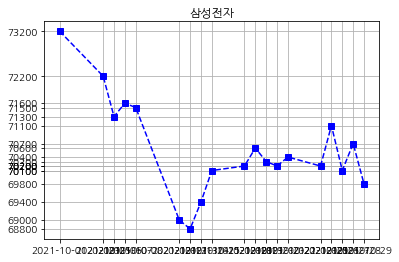

In [22]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.title('삼성전자')
plt.plot(df.Close,'bs--')
plt.xticks(df.index)
plt.yticks(df.Close.values)
plt.grid(True)
plt.savefig('test.png')
plt.show()

# pyplot으로 그린 도표에 한글이 깨지는 현상 해결방법

## 한글 나눔폰트를 시스템에 설치한다.
- $ sudo apt-get update
- $ sudo apt-get install fonts-nanum* 
- /usr/share/fonts 밑에 nanum 폴더 생기고 폰트가 들어가 있다.

## 폰트캐쉬는 삭제해준다.
- $ sudo fc-cache -fv

## pip 를 통하여 설치한 matplotlib 의 설치경로를 확인한다
- pip show matplotlib
  Location: /home/demian/.local/lib/python3.8/site-packages

## 시스템 폰트를 matplotlib가 사용는 폰트공간으로 copy 한다. 
-  cp /usr/share/fonts/truetype/nanum/*.* ~/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/.

## fontManager를 이용하여 폰트가 나타나는지 확인
    from matplotlib import font_manager as fm
    for font in fm.fontManager.ttflist:
        if 'Nanum' in font.name :
            print(font.name,font.fname)

##  참고로 시스템의 폰트를 보는 방법.
    sys_font=fm.findSystemFonts()
    print(sys_font)
